## Корреляция

Посмотрим, как считать изученные коэффициенты корреляции в Python

In [1]:
# как обычно, начнем с импорта нужных библиотек
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# и зафиксируем seed
np.random.seed(123)

В файле **pressure.xls** приводятся для 15 пациентов данные о систолическом и диастолическом давлении крови непосредственно до принятия и спустя 2 часа после принятия 25 мг каптоприла. 
  
Имеется ли связь между снижением систолического и диастолического давления? Вычислите все изученные коэфиициенты корреляции и проверьте их значимость. Есть ли среди данных выбросы? 

In [3]:
# сначала импортируем данные

data = pd.read_excel('data/pressure.xls')

In [4]:
data

,СистДо,СистПосл,ДиасДо,ДиасПосл
0,210,201,130,125
1,169,165,122,121
2,187,166,124,121
3,160,157,104,106
4,167,174,112,100
5,176,145,103,85
6,185,168,121,98
7,206,180,124,105
8,173,147,115,103
9,146,136,100,98


In [5]:
DP1 = data["СистДо"] - data["СистПосл"]
DP2 = data["ДиасДо"] - data["ДиасПосл"]

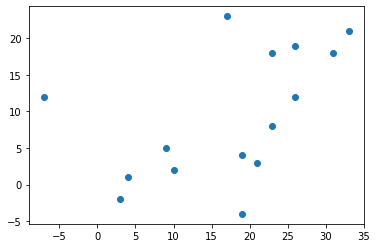

In [6]:
# посмотрим на данные

plt.scatter(DP1, DP2)
plt.show()

In [7]:
# коэффициент корреляции Пирсона

stats.pearsonr(DP1,DP2)

(0.49504892295474656, 0.06062278606988294)

In [8]:
# коэффициент корреляции Спирмена

stats.spearmanr(DP1,DP2)

SpearmanrResult(correlation=0.5560540352929466, pvalue=0.031360922746895184)

In [9]:
# коэффициент корреляции Кендалла

stats.kendalltau(DP1,DP2)

KendalltauResult(correlation=0.4487858273467833, pvalue=0.0220031258370319)

Давайте уберем одну точку, которая нам кажется выбросом и посмотрим, что случится с коэффициентами корреляции. У этой точки отрицательные изменения в DP1.

In [10]:
data_new = data[DP1>0]

DP1_new = data_new["СистДо"] - data_new["СистПосл"]
DP2_new = data_new["ДиасДо"] - data_new["ДиасПосл"]

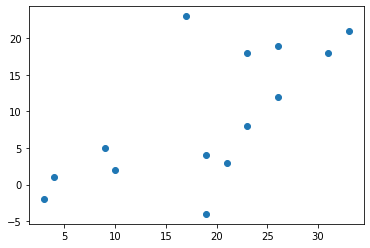

In [11]:
# еще раз посмотрим на данные

plt.scatter(DP1_new, DP2_new)
plt.show()

In [12]:
# коэффициент корреляции Пирсона

stats.pearsonr(DP1_new,DP2_new)

(0.6797987810762679, 0.0074792869569106826)

In [13]:
# коэффициент корреляции Спирмена

stats.spearmanr(DP1_new,DP2_new)

SpearmanrResult(correlation=0.6567344919942403, pvalue=0.01072757218087102)

In [14]:
# коэффициент корреляции Кендалла

stats.kendalltau(DP1_new,DP2_new)

KendalltauResult(correlation=0.550596554344981, pvalue=0.006963398309063252)

**Вывод** в этой задаче мы делаем следующий: снижение систолического и диастолического давления положительно коррелированы. И эта корреляция значима. Кроме того, мы лишний раз убедились в том, что коэффициент корреляции Пирсона подвержен сильному влиянию выбросов. 